In [1]:
#Se cargan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Se lee el archivo y se le asigna la variable df9
df9 = pd.read_csv('vid18_180219.dat', skiprows=1, sep=',',header=None,names=["TIMESTAMP","RECORD","batt_volt_Min","logger_temp","short_up_Avg","short_dn_Avg","long_up_Avg","long_dn_Avg","cnr4_T_C_Avg","cnr4_T_K_Avg","long_up_corr_Avg","long_dn_corr_Avg","Rs_net_Avg","Rl_net_Avg","albedo_Avg","Rn_Avg","AirTC_Avg","RH","WS_ms_S_WVT","WindDir_D1_WVT","WindDir_SD1_WVT","Temp_C_Avg(1)","Temp_C_Avg(2)","Temp_C_Avg(3)","Temp_C_Avg(4)","Result1_Avg","Result2_Avg","Result3_Avg","Result4_Avg","Result5_Avg","Result6_Avg","Result7_Avg","Result8_Avg","Result9_Avg","Riego_mm_Tot","Perco_mm_Tot"])

#Se transforma nuestra columna TIMESTAMP que representa el tiempo en datetime
df9['TIMESTAMP'] = pd.to_datetime(df9.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)
df9 = pd.DataFrame(df9)

#Solo nos interesan 2 columnas  TIMESTAMP (Fecha) y  AirTC_Avg (Temperatura del aire, ºC).
df9.dtypes 
df9 = df9[['TIMESTAMP','AirTC_Avg']]

#Creamos una columna para los días, años, meses y horas
df9['MES'] = df9['TIMESTAMP'].dt.month
df9['AÑO'] = df9['TIMESTAMP'].dt.year
df9['DIA'] = df9['TIMESTAMP'].dt.day
df9['HORA'] = df9['TIMESTAMP'].dt.hour

#Sacamos la temperatura media por hora que es con la que vamos a trabajar 
dfmedia = df9.set_index('TIMESTAMP').resample('H').mean()

In [3]:

#Se agarran los valores desde noviembre hasta el ultimo dato
dfmedia = dfmedia.loc['2018-11-01 00:00:00':'2019-02-18 07:30:00']

In [4]:
#Establecemos condiciones para los valores de UF
conditions = [
    (dfmedia['AirTC_Avg'] >= 1.5) & (dfmedia['AirTC_Avg'] <= 2.4),
    (dfmedia['AirTC_Avg'] >= 2.5) & (dfmedia['AirTC_Avg'] <= 9.1),
    (dfmedia['AirTC_Avg'] >= 9.2) & (dfmedia['AirTC_Avg'] <= 12.4),
    (dfmedia['AirTC_Avg'] >= 12.5) & (dfmedia['AirTC_Avg'] <= 15.9),
    (dfmedia['AirTC_Avg'] >= 16) & (dfmedia['AirTC_Avg'] <=18),
    (dfmedia['AirTC_Avg'] > 18 )]

choices = [0.5, 1.0, 0.5, 0, -0.5, -1.0]
#LE damos los valores a UF
dfmedia['UF'] = np.select(conditions, choices, default=0)

#Se calcula UF24
dfmedia['UF24'] = dfmedia.groupby(['AÑO','MES','DIA'])['UF'].transform('sum')

In [5]:
#Se rea una tabla df10 con la suma por hora
df10 = dfmedia[['AirTC_Avg']]
df10 = df10.resample('D').sum()


In [6]:
#Se le asigna el valor de la suma a una nueva columna UF24
df10 ['UF'] = dfmedia['UF24']

#En el dataframe dfmedia se calculan las temperaturas maximas y minimas por dìa 

dfmedia ['TMAX'] = df9.set_index('TIMESTAMP').resample('D')["AirTC_Avg"].max()

dfmedia ['TMIN'] = df9.set_index('TIMESTAMP').resample('D')["AirTC_Avg"].min() 

#Se crea un nuevo data frame con la media por dìa, si lel valor se mantiene igual todo el dìa no tiene que cambiar
dfdia = dfmedia.resample('D').mean()

In [10]:
dfmedia

,AirTC_Avg,MES,AÑO,DIA,HORA,UF,UF24,TMAX,TMIN
TIMESTAMP,,,,,,,,,
2018-11-01 00:00:00,8.708333,11.0,2018.0,1.0,0.0,1.0,-0.5,29.580,6.096
2018-11-01 01:00:00,8.493333,11.0,2018.0,1.0,1.0,1.0,-0.5,NaN,NaN
2018-11-01 02:00:00,8.690000,11.0,2018.0,1.0,2.0,1.0,-0.5,NaN,NaN
2018-11-01 03:00:00,8.846667,11.0,2018.0,1.0,3.0,1.0,-0.5,NaN,NaN
2018-11-01 04:00:00,7.397500,11.0,2018.0,1.0,4.0,1.0,-0.5,NaN,NaN
2018-11-01 05:00:00,7.289833,11.0,2018.0,1.0,5.0,1.0,-0.5,NaN,NaN
2018-11-01 06:00:00,6.806833,11.0,2018.0,1.0,6.0,1.0,-0.5,NaN,NaN
2018-11-01 07:00:00,8.110167,11.0,2018.0,1.0,7.0,1.0,-0.5,NaN,NaN
2018-11-01 08:00:00,14.960000,11.0,2018.0,1.0,8.0,0.0,-0.5,NaN,NaN


In [11]:
dfdia

,AirTC_Avg,MES,AÑO,DIA,HORA,UF,UF24,TMAX,TMIN
TIMESTAMP,,,,,,,,,
2018-11-01,16.269347,11.0,2018.0,1.0,11.5,-0.020833,-0.5,29.580,6.096
2018-11-02,19.581528,11.0,2018.0,2.0,11.5,-0.375000,-9.0,31.350,10.020
2018-11-03,19.061736,11.0,2018.0,3.0,11.5,-0.395833,-9.5,30.480,10.160
2018-11-04,20.023194,11.0,2018.0,4.0,11.5,-0.479167,-11.5,31.390,11.160
2018-11-05,19.522153,11.0,2018.0,5.0,11.5,-0.333333,-8.0,31.210,11.130
2018-11-06,20.435764,11.0,2018.0,6.0,11.5,-0.500000,-12.0,32.700,11.620
2018-11-07,20.062361,11.0,2018.0,7.0,11.5,-0.354167,-8.5,32.460,10.530
2018-11-08,19.778681,11.0,2018.0,8.0,11.5,-0.416667,-10.0,31.350,10.090
2018-11-09,19.187361,11.0,2018.0,9.0,11.5,-0.354167,-8.5,29.860,10.960


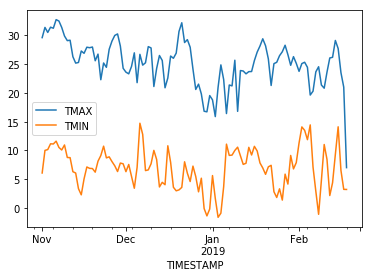

In [7]:
#Se regresa timestamp a una columna y se grafica la temperatura maxima y minima para gràficar
dfdia.reset_index().plot(x="TIMESTAMP",y=["TMAX","TMIN"])

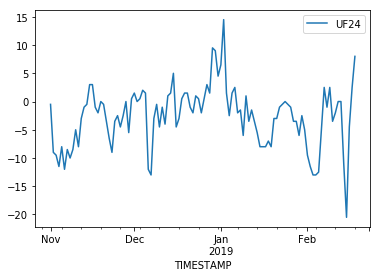

In [8]:
#Se gràfica la evoluciòn diaria de UF24 
dfdia.reset_index().plot(x="TIMESTAMP",y=["UF24"])

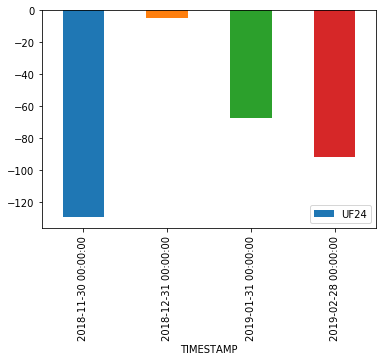

In [9]:
#Se calcula la suma de df24 por mes y se gráfica su acumulación 
dfmes= dfdia.resample('M').sum()
dfmes.reset_index().plot.bar(x="TIMESTAMP",y="UF24")